### homework2:对随机一张灰度图片进行线性、分段线性、非线性的点运算，对比原图和进行灰度变化后的效果(第三章）

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### 2.1线性点运算

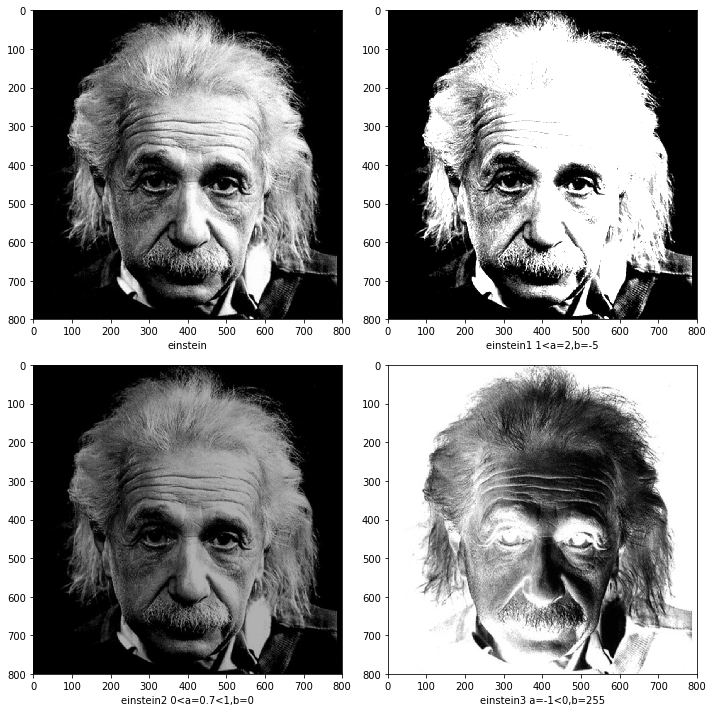

In [2]:
einstein = Image.open('./einstein.jpg').convert('L')
einstein = np.array(einstein)
#print(einstein[0:5,0:5])
# a>1
einstein1 = 2.0*einstein-5  #为什么2*与2.0*结果不同  0*2=251？

# 1>a>0
einstein2 = 0.7*einstein

# a=-1
einstein3 = 255-einstein

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(einstein, cmap='gray',vmin=0,vmax=255),plt.xlabel('einstein')
plt.subplot(222), plt.imshow(einstein1, cmap='gray',vmin=0,vmax=255),plt.xlabel('einstein1 1<a=2,b=-5')
plt.subplot(223), plt.imshow(einstein2, cmap='gray',vmin=0,vmax=255),plt.xlabel('einstein2 0<a=0.7<1,b=0')
plt.subplot(224), plt.imshow(einstein3, cmap='gray',vmin=0,vmax=255),plt.xlabel('einstein3 a=-1<0,b=255')
plt.tight_layout()
plt.show()

#### 2.2 分段线性运算

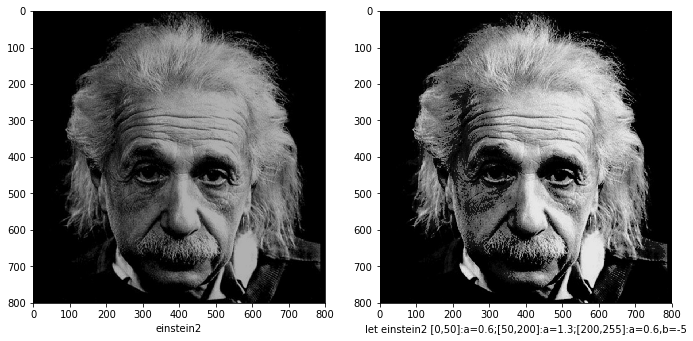

In [3]:
#[0,50]:0.6x; [50,200]:1.3x; [200,255]:0.6x-5
einstein4 = (0.6*einstein2)*(einstein2<=50) + (1.3*einstein2)*(50<einstein2)*(einstein2<=200) + (0.6*einstein2-5)*(200<einstein2)
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(einstein2, cmap='gray',vmin=0,vmax=255),plt.xlabel('einstein2')
plt.subplot(122), plt.imshow(einstein4, cmap='gray',vmin=0,vmax=255),plt.xlabel('let einstein2 [0,50]:a=0.6;[50,200]:a=1.3;[200,255]:a=0.6,b=-5')
plt.tight_layout()
plt.show()

#### 2.3 非线性运算

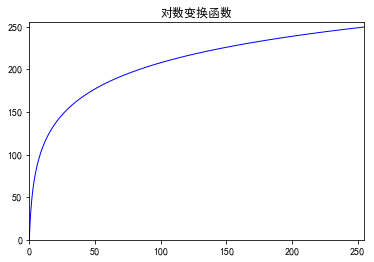

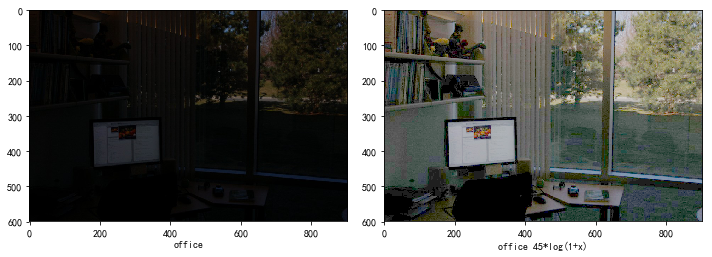

In [4]:
#对数运算y=c*log(1+x)
office = Image.open('./office.jpg')
office = np.array(office)

c=45

x = np.arange(0, 256, 0.1)
y = c * np.log(1 + x)
plt.plot(x, y, 'b', linewidth=1)
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.title(u'对数变换函数')
plt.xlim(0, 255), plt.ylim(0, 255)
plt.show()

office1 = c * np.log(1.0 + office)/255
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(office, vmin=0,vmax=255),plt.xlabel('office')
plt.subplot(122), plt.imshow(office1, vmin=0,vmax=255),plt.xlabel('office 45*log(1+x)')
plt.tight_layout()
plt.show()

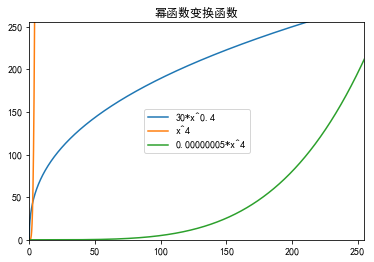

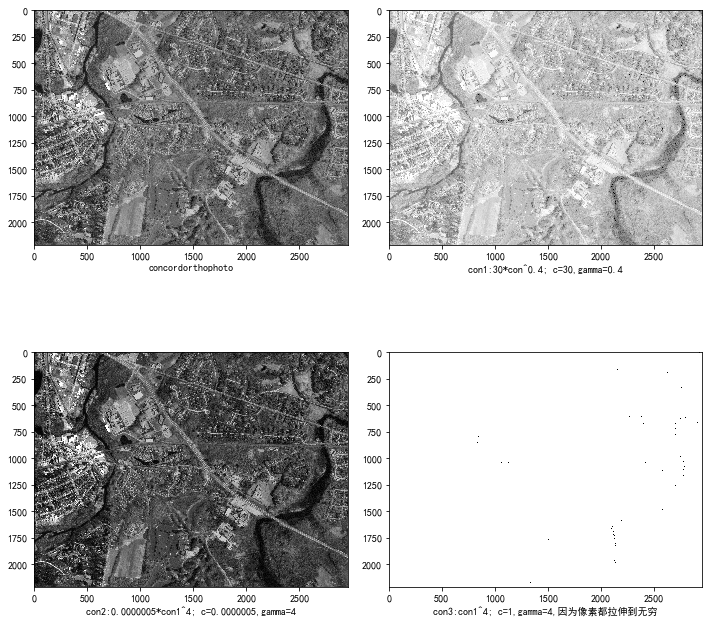

In [6]:
#幂运算
con = Image.open('./concordorthophoto.png')
con = np.array(con)

c=1

x = np.arange(0, 256, 0.1)
y1 = 30 * x**0.4 #c=1,gamma=3
y2 = c * x**4 #c=1,gamma=4
y3 = 0.00000005*x**4 #c=0.00000005,gamma=4

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['30*x^0.4','x^4','0.00000005*x^4'],loc='center')
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.title(u'幂函数变换函数')
plt.xlim(0, 255), plt.ylim(0, 255)
plt.show()

con1 = 30*con**0.4
con2 = 0.00000005 * con1**4
con3 = con1**4  

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(con,cmap='gray', vmin=0,vmax=255),plt.xlabel('concordorthophoto')
plt.subplot(222), plt.imshow(con1,cmap='gray', vmin=0,vmax=255),plt.xlabel('con1:30*con^0.4; c=30,gamma=0.4')
plt.subplot(223), plt.imshow(con2,cmap='gray', vmin=0,vmax=255),plt.xlabel('con2:0.0000005*con1^4; c=0.0000005,gamma=4')
plt.subplot(224), plt.imshow(con3,cmap='gray', vmin=0,vmax=255),plt.xlabel('con3:con1^4; c=1,gamma=4,因为像素都拉伸到无穷')
plt.tight_layout()
plt.show()